In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='Malgun Gothic')
rc('axes', unicode_minus=False)


# Load Dataset

In [2]:
def load_dataset(path):    
    cols = ['id', 'month', 'day', 'time', 'temp', 'abs_temp', 'dew_temp', 'hum', 'air_pressure', 'sat_pressure',
            'actual_pressure', 'vapor_pressure_deficlt', 'vapor_amount', 'air_density', 'wind_direction', 'wind_speed']
    train = pd.read_csv(path + 'train.csv')
    test = pd.read_csv(path + 'test.csv')
    train.columns = cols
    test.columns = cols[:-1]
    submission = pd.read_csv(path + 'sample_submission.csv')
    return train, test, submission

path = 'data/'
train, test, submission = load_dataset(path)

In [3]:
display(train.tail(2))
display(test.tail(2))

,id,month,day,time,temp,abs_temp,dew_temp,hum,air_pressure,sat_pressure,actual_pressure,vapor_pressure_deficlt,vapor_amount,air_density,wind_direction,wind_speed
36579,TRAIN_36579,9,10,저녁,25.65,299.81,15.30,52.81,988.39,32.98,17.41,15.56,11.03,1144.61,225.40,0.36
36580,TRAIN_36580,3,11,오전,3.14,276.30,1.88,91.40,1000.01,7.66,7.00,0.66,4.37,1257.47,30.67,4.33


,id,month,day,time,temp,abs_temp,dew_temp,hum,air_pressure,sat_pressure,actual_pressure,vapor_pressure_deficlt,vapor_amount,air_density,wind_direction
15676,TEST_15676,2,4,새벽,3.07,276.68,-0.95,74.8,994.31,7.62,5.70,1.92,3.57,1251.24,269.7
15677,TEST_15677,2,1,오전,9.01,283.38,8.36,95.7,985.13,11.50,11.01,0.49,6.98,1211.08,196.2


In [4]:
print("-- Size -- ")
print(f"Train-set : {train.shape}")
print(f"Test-set  : {test.shape}")

-- Size -- 
Train-set : (36581, 16)
Test-set  : (15678, 15)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36581 entries, 0 to 36580
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      36581 non-null  object 
 1   month                   36581 non-null  int64  
 2   day                     36581 non-null  int64  
 3   time                    36581 non-null  object 
 4   temp                    36581 non-null  float64
 5   abs_temp                36581 non-null  float64
 6   dew_temp                36581 non-null  float64
 7   hum                     36581 non-null  float64
 8   air_pressure            36581 non-null  float64
 9   sat_pressure            36581 non-null  float64
 10  actual_pressure         36581 non-null  float64
 11  vapor_pressure_deficlt  36581 non-null  float64
 12  vapor_amount            36581 non-null  float64
 13  air_density             36581 non-null  float64
 14  wind_direction          36581 non-null

In [6]:
train.describe()

,month,day,temp,abs_temp,dew_temp,hum,air_pressure,sat_pressure,actual_pressure,vapor_pressure_deficlt,vapor_amount,air_density,wind_direction,wind_speed
count,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.00000,36581.000000
mean,6.511468,15.648561,9.992694,283.971095,5.453064,75.827418,990.032953,14.037167,9.786895,4.250224,6.178010,1214.580682,176.58240,2.036446
std,3.458678,8.803467,8.237177,8.354235,6.327009,16.089188,8.824477,8.075680,4.185701,5.191128,2.655054,39.528520,84.38269,1.544146
min,1.000000,1.000000,-13.930000,258.870000,-15.560000,23.640000,956.890000,2.070000,1.810000,0.000000,1.120000,1110.650000,0.01000,0.100000
25%,4.000000,8.000000,3.650000,277.700000,0.450000,65.360000,985.100000,7.940000,6.310000,0.950000,3.980000,1184.030000,129.40000,0.920000
50%,7.000000,16.000000,9.130000,283.170000,5.070000,79.000000,990.250000,11.590000,8.770000,2.250000,5.520000,1214.650000,199.50000,1.630000
75%,9.000000,23.000000,16.350000,290.370000,10.950000,89.200000,995.700000,18.620000,13.100000,5.410000,8.270000,1241.600000,233.90000,2.700000
max,12.000000,31.000000,34.340000,308.620000,20.150000,100.000000,1015.300000,54.270000,23.640000,41.230000,14.980000,1349.460000,360.00000,11.890000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15678 entries, 0 to 15677
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      15678 non-null  object 
 1   month                   15678 non-null  int64  
 2   day                     15678 non-null  int64  
 3   time                    15678 non-null  object 
 4   temp                    15678 non-null  float64
 5   abs_temp                15678 non-null  float64
 6   dew_temp                15678 non-null  float64
 7   hum                     15678 non-null  float64
 8   air_pressure            15678 non-null  float64
 9   sat_pressure            15678 non-null  float64
 10  actual_pressure         15678 non-null  float64
 11  vapor_pressure_deficlt  15678 non-null  float64
 12  vapor_amount            15678 non-null  float64
 13  air_density             15678 non-null  float64
 14  wind_direction          15678 non-null

In [8]:
test.describe()

,month,day,temp,abs_temp,dew_temp,hum,air_pressure,sat_pressure,actual_pressure,vapor_pressure_deficlt,vapor_amount,air_density,wind_direction
count,15678.000000,15678.000000,15678.000000,15678.000000,15678.000000,15678.000000,15678.000000,15678.000000,15678.000000,15678.000000,15678.000000,15678.000000,15678.000000
mean,6.419824,15.704809,9.979285,283.962533,5.432401,75.785707,989.973395,14.009120,9.770344,4.238746,6.167816,1214.566204,177.661325
std,3.431733,8.767048,8.209709,8.327606,6.311756,16.124003,8.863179,8.000735,4.180016,5.108952,2.651229,39.441985,84.502829
min,1.000000,1.000000,-13.740000,259.120000,-15.310000,23.940000,956.990000,2.110000,1.850000,0.000000,1.150000,1111.110000,0.150000
25%,3.000000,8.000000,3.640000,277.762500,0.410000,65.190000,985.070000,7.930000,6.290000,0.950000,3.970000,1184.332500,130.950000
50%,6.000000,16.000000,9.200000,283.200000,4.990000,79.200000,990.180000,11.650000,8.720000,2.280000,5.490000,1214.285000,200.300000
75%,9.000000,23.000000,16.300000,290.320000,10.880000,89.200000,995.740000,18.560000,13.040000,5.450000,8.230000,1241.470000,235.100000
max,12.000000,31.000000,34.350000,308.620000,19.860000,100.000000,1015.350000,54.300000,23.220000,41.080000,14.710000,1347.930000,360.000000


In [9]:
train.columns.difference(test.columns)

Index(['wind_speed'], dtype='object')

## ID

In [10]:
print("Min/Max of id in Train-set")
display( train['id'].agg(['min','max']) )

print('='* 80)
print(f'Size : {len(train)}')

Min/Max of id in Train-set


min    TRAIN_00000
max    TRAIN_36580
Name: id, dtype: object

Size : 36581


In [11]:
# test-set의 id는?
print("Min/Max of id in Test-set")
display( test['id'].agg(['min','max']) )

print('='* 80)
print(f'Size : {len(test)}')

Min/Max of id in Test-set


min    TEST_00000
max    TEST_15677
Name: id, dtype: object

Size : 15678


In [12]:
train.columns

Index(['id', 'month', 'day', 'time', 'temp', 'abs_temp', 'dew_temp', 'hum',
       'air_pressure', 'sat_pressure', 'actual_pressure',
       'vapor_pressure_deficlt', 'vapor_amount', 'air_density',
       'wind_direction', 'wind_speed'],
      dtype='object')

In [13]:
print("Min/Max of date in Train-set")
display( train['month'].agg(['min','max']) )

print('='* 80)
print(f'Unique : {sorted(train["month"].unique())}')

Min/Max of date in Train-set


min     1
max    12
Name: month, dtype: int64

Unique : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [14]:
print("Min/Max of date in Test-set")
display( test['month'].agg(['min','max']) )

print('='* 80)
print(f'Unique : {sorted(test["month"].unique())}')

Min/Max of date in Test-set


min     1
max    12
Name: month, dtype: int64

Unique : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


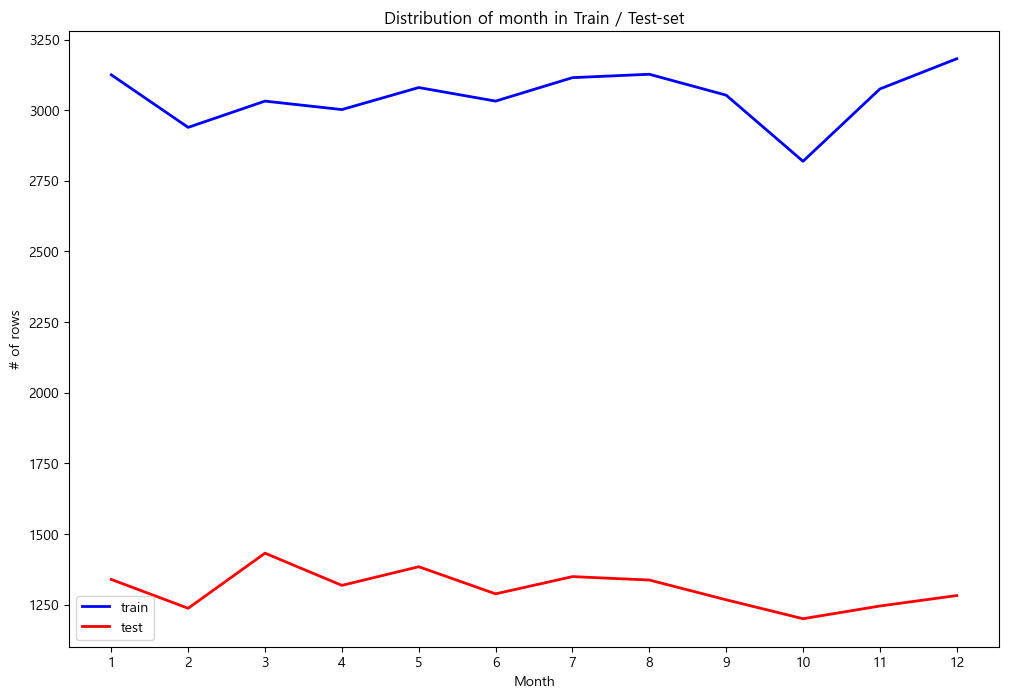

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

train['month'].value_counts().sort_index().plot(color='b', lw=2, label='train')
test['month'].value_counts().sort_index().plot(color='r', lw=2, label='test')

ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('# of rows')
ax.set_xticks(range(1, 13))
ax.set_title('Distribution of month in Train / Test-set')
plt.show()

In [16]:
print("Min/Max of day in Train-set")
display( train['day'].agg(['min','max']) )

print('='* 80)
print(f'Unique : {sorted(train["day"].unique())}')

Min/Max of day in Train-set


min     1
max    31
Name: day, dtype: int64

Unique : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [17]:
print("Min/Max of day in Test-set")
display( test['day'].agg(['min','max']) )

print('='* 80)
print(f'Unique : {sorted(test["day"].unique())}')

Min/Max of day in Test-set


min     1
max    31
Name: day, dtype: int64

Unique : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


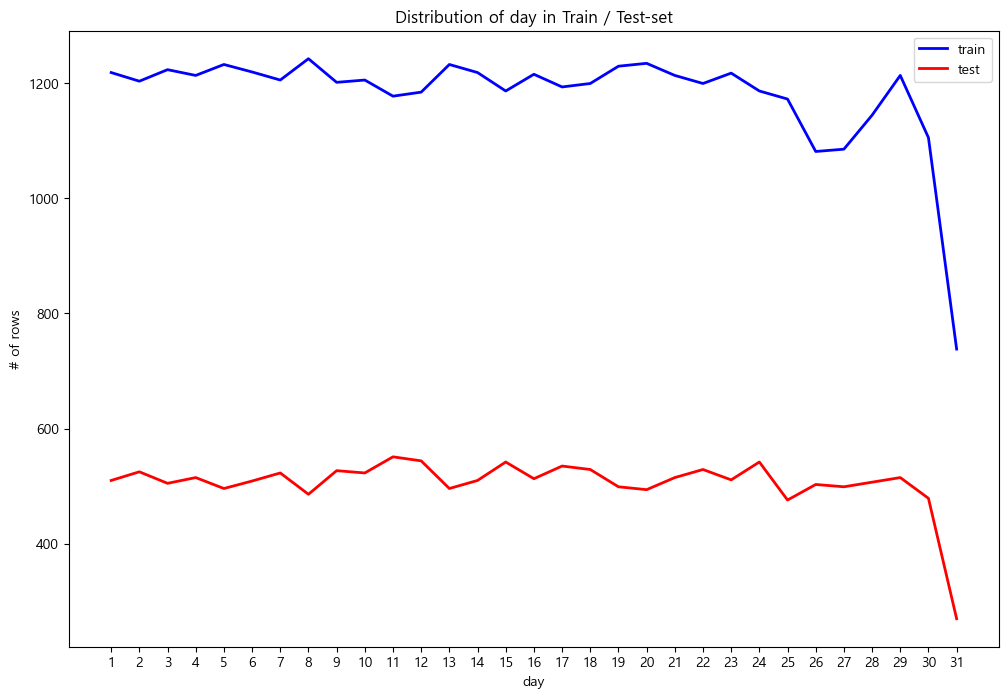

In [18]:
# 31일 데이터가 적다
fig, ax = plt.subplots(figsize=(12, 8))

train['day'].value_counts().sort_index().plot(color='b', lw=2, label='train')
test['day'].value_counts().sort_index().plot(color='r', lw=2, label='test')

ax.legend()
ax.set_xlabel('day')
ax.set_ylabel('# of rows')
ax.set_xticks(range(1, 32))
ax.set_title('Distribution of day in Train / Test-set')
plt.show()

In [19]:
print('='* 80)
print(f'Unique : {sorted(train["time"].unique())}')

print('='* 80)
print(f'Unique : {sorted(test["time"].unique())}')

Unique : ['새벽', '오전', '오후', '저녁']
Unique : ['새벽', '오전', '오후', '저녁']


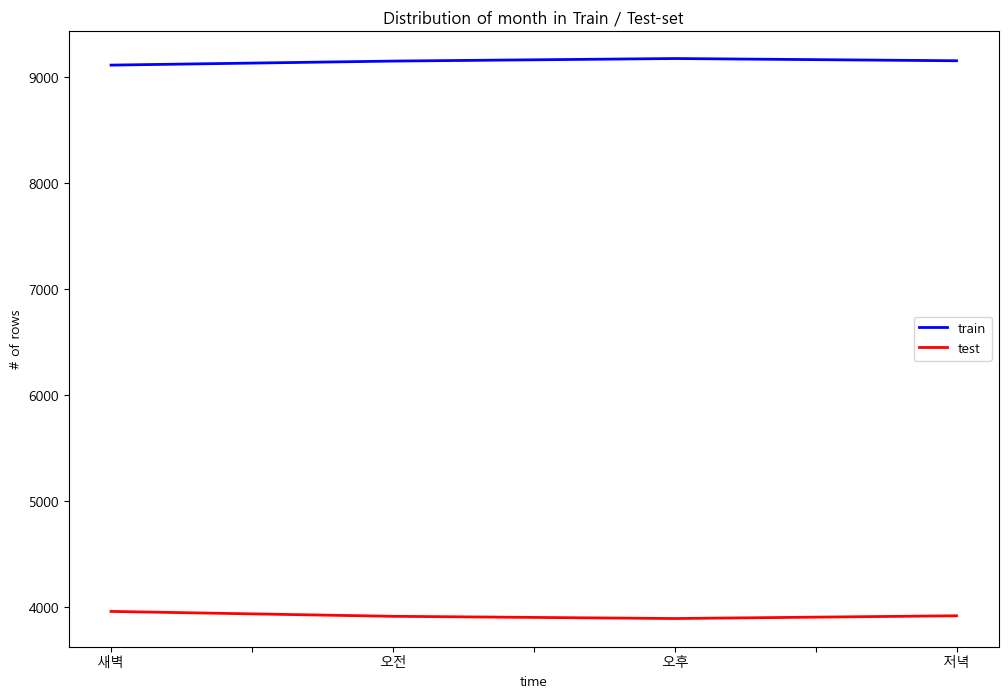

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

train['time'].value_counts().sort_index().plot(color='b', lw=2, label='train')
test['time'].value_counts().sort_index().plot(color='r', lw=2, label='test')

ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('# of rows')
# ax.set_xticks(range(1, 5), ['새벽', '오전', '오후', '저녁'])
ax.set_title('Distribution of month in Train / Test-set')
plt.show()

count    36581.000000
mean         9.992694
std          8.237177
min        -13.930000
25%          3.650000
50%          9.130000
75%         16.350000
max         34.340000
Name: temp, dtype: float64


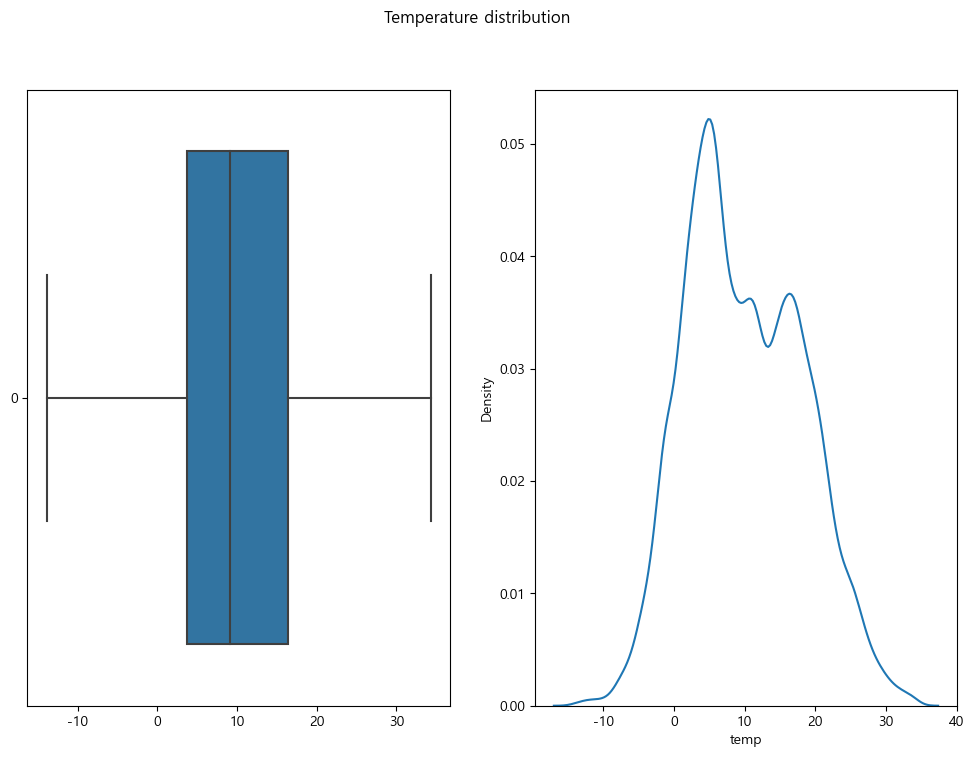

In [21]:
print(train['temp'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
sns.boxplot(train['temp'], orient='h', ax=ax[0])
sns.kdeplot(train['temp'], ax=ax[1])
fig.suptitle('Temperature distribution')
plt.show()

<Axes: xlabel='wind_speed', ylabel='Density'>

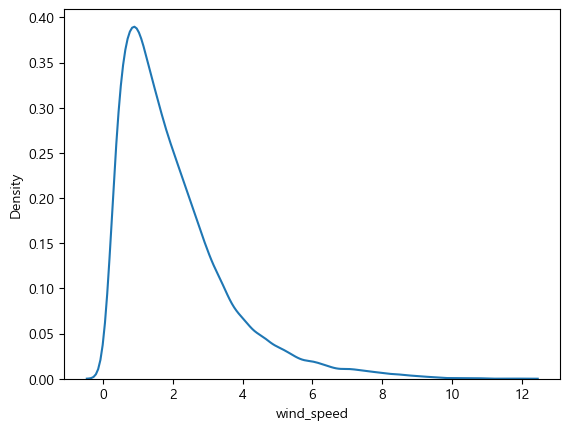

In [22]:
sns.kdeplot(train['wind_speed'])

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np
import random
import os

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [ ]:
def load_dataset(path):    
    # cols = ['id', 'month', 'day', 'time', 'temp', 'abs_temp', 'dew_temp', 'hum', 'air_pressure', 'sat_pressure',
    #         'actual_pressure', 'vapor_pressure_deficlt', 'vapor_amount', 'air_density', 'wind_direction', 'wind_speed']
    train = pd.read_csv(path + 'train.csv')
    test = pd.read_csv(path + 'test.csv')
    train.columns = cols
    test.columns = cols[:-1]
    submission = pd.read_csv(path + 'sample_submission.csv')
    return train, test, submission

path = 'data/'
train, test, submission = load_dataset(path)

In [ ]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [ ]:
display(train.tail(2))
display(test.tail(2))
display(submission.tail(2))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# tree모델은 오히려 one-hot encoding이 성능이 저하되는 경우가 있음
le = LabelEncoder()
le = le.fit(train['측정 시간대'])
train['측정 시간대'] = le.transform(train['측정 시간대'])
test['측정 시간대'] = le.transform(test['측정 시간대'])

In [ ]:
label = '풍속 (m/s)'

In [ ]:
print("Summary of class variable: \n", train[label].describe())

In [ ]:
# feature engeneering 
# 연속형 월, 날짜 변경
def encode(data, col, max_val):
  data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
  data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
  return data

In [ ]:
train = encode(train, '월', 12)
train = encode(train, '일', 31)
test = encode(test, '월', 12)
test = encode(test, '일', 31)

train.drop(['월', '일'], axis=1, inplace=True)
test.drop(['월', '일'], axis=1, inplace=True)

In [ ]:
train['절대 습도'] = (train['상대 습도 (%)'] * train['포화 증기압(mbar)'] * 10) / (2.16679 * train['절대 온도(K)'])
test['절대 습도'] = (test['상대 습도 (%)'] * test['포화 증기압(mbar)'] * 10) / (2.16679 * test['절대 온도(K)'])

In [ ]:
time_limit = 3600*3
metric = 'mean_absolute_error'
predictor = TabularPredictor(label, eval_metric=metric, path='wind_preprocess_3').fit(train, time_limit=time_limit, presets='best_quality', num_stack_levels=3)

In [ ]:
predictor.fit_summary(show_plot=True)

In [ ]:
submission['풍속 (m/s)'] = predictor.predict(test)
submission.tail(2)

In [ ]:
submission.to_csv(path + 'submission_3hour.csv', index=  False)